<a href="https://colab.research.google.com/github/AvinashTiwari/MachineLearning/blob/master/Classification_MachinceLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd = pd.read_csv("diabetes.csv")

In [2]:
pd.head()

,Glucose,BMI,Outcome
0,141,33.02,0
1,83,30.20,0
2,128,27.16,0
3,112,35.16,1
4,71,27.22,0


In [3]:
pd.isnull()

,Glucose,BMI,Outcome
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
495,False,False,False
496,False,False,False
497,False,False,False
498,False,False,False


In [4]:
pd.isnull().sum()

Glucose    0
BMI        0
Outcome    0
dtype: int64

In [5]:
pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  500 non-null    int64  
 1   BMI      500 non-null    float64
 2   Outcome  500 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 11.8 KB


In [6]:
df = pd

In [7]:
df["Outcome"].value_counts()

0    326
1    174
Name: Outcome, dtype: int64

In [8]:
df["Outcome"].value_counts(normalize=True)

0    0.652
1    0.348
Name: Outcome, dtype: float64

In [9]:
x = df.iloc[:,:-1].values
y = df["Outcome"].values.reshape(-1,1)

In [10]:
x.shape

(500, 2)

In [11]:
y.shape

(500, 1)

In [30]:
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0, stratify=y)

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf =  DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

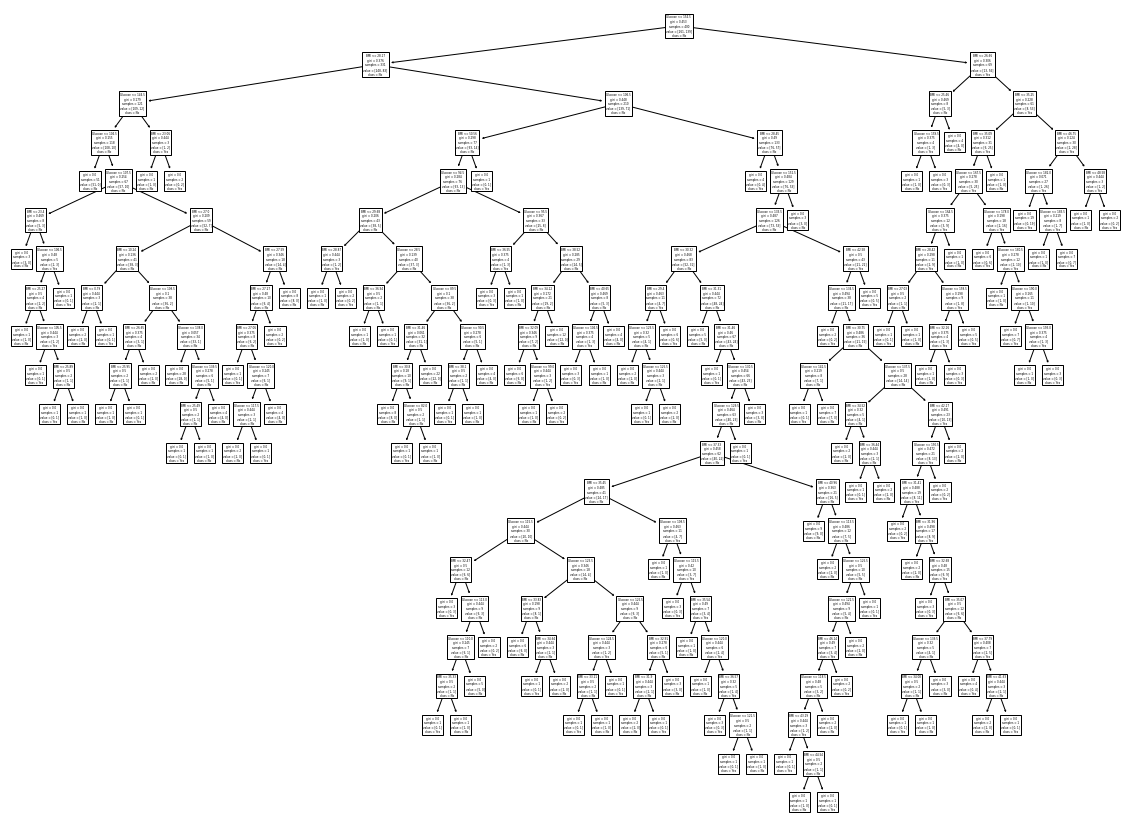

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(clf, feature_names=["Glucose","BMI"], class_names=["No", "Yes"])
plt.show()

In [33]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

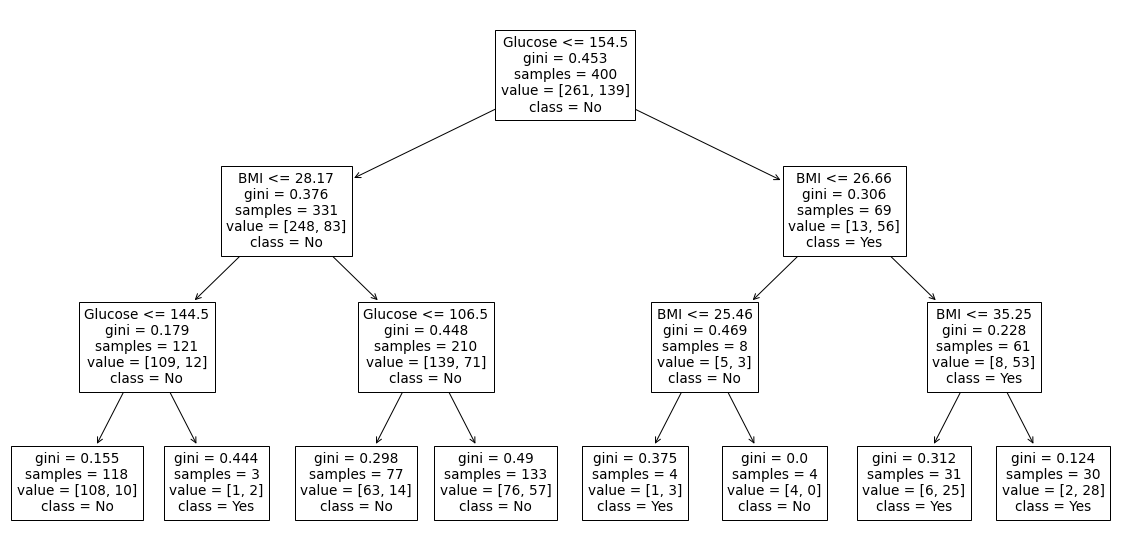

In [34]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=["Glucose","BMI"], class_names=["No", "Yes"])
plt.show()

In [35]:
df.head()

,Glucose,BMI,Outcome
0,141,33.02,0
1,83,30.20,0
2,128,27.16,0
3,112,35.16,1
4,71,27.22,0


In [36]:
clf.predict([[90,25]])

array([0])

In [37]:
clf.predict([[170,25]])

array([1])

In [38]:
from  sklearn.model_selection import cross_val_score
score = cross_val_score(clf,x_train,y_train,cv=5, scoring="accuracy")
acc = score.mean()
print(acc)

0.7474999999999999


In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=600, max_depth=5, random_state=8)
rf_clf.fit(x_train, y_train)
score = cross_val_score(rf_clf,x_train, y_train, cv=5, scoring="accuracy")
acc = score.mean()
print(acc)

<ipython-input-43-e9e4910434f0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(x_train, y_train)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

0.7424999999999999
